Your goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
from IPython.display import clear_output

# Gather

Import WeRateDogs archive data from csv file to `df_archive`

In [2]:
df_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Next, download image prediction tsv and import as `df_image`

In [3]:
image_prediction_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(image_prediction_url)
with open('image_prediction.tsv', 'wb') as f:
    f.write(r.content)
df_image = pd.read_csv('image_prediction.tsv', sep='\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


By using Tweepy, download tweet's retweet and like count from Twitter API. 

In [4]:
# auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
# auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

# api = tweepy.API(auth)
# api.wait_on_rate_limit = True
# api.wait_on_rate_limit_notify = True

# # get tweet id list from df_archive
# tweet_ids = df_archive.tweet_id.tolist()
# # create counter for remaining tweets not yet downloaded
# counter = len(tweet_ids)
# # record tweet id that are not downloaded sucessfully
# missing_tweet_id = []
# # create tweet_json.txt if not exist, reset current data if exist
# with open('tweet_json.txt', 'w+') as f:
#     f.write('')
# for tweet_id in tweet_ids:
#     # clear current console output
#     clear_output(wait=True)
#     try:
#         # get tweet data by tweet_id
#         tweet = api.get_status(id=tweet_id, tweet_mode='extended')
#         with open('tweet_json.txt', 'a+') as f:
#             json.dump(tweet._json, f)
#             f.write('\n')
#     # print a msg and add id to missing_tweet_id if tweet_id not found
#     except tweepy.TweepError:
#         print(f'{tweet_id} not found')
#         missing_tweet_id.append(tweet_id)
#     counter -= 1
#     print(f'{counter} tweets remaining')
# print(f'{len(tweet_ids) - len(missing_tweet_id)} tweets downloaded sucessfully, {len(missing_tweet_id)} tweets not found')

Read json data from tweet_json.txt

In [5]:
list_tweet_data = []
with open('tweet_json.txt', 'r') as f:
    for line in f:
        # convert json str to dict object
        json_data = json.loads(line)
        # add each dict (id, favorite_count, retweet_count) to tweet_data list
        list_tweet_data.append({'id': json_data['id'], 'favorite_count': json_data['favorite_count'], 'retweet_count': json_data['retweet_count']})

Import tweet data to `df_tweet`

In [6]:
df_tweet = pd.DataFrame(list_tweet_data, columns = ['id', 'favorite_count', 'retweet_count'])
df_tweet.head(10)

,id,favorite_count,retweet_count
0,892420643555336193,34931,7334
1,892177421306343426,30251,5473
2,891815181378084864,22771,3620
3,891689557279858688,38183,7514
4,891327558926688256,36452,8095
5,891087950875897856,18390,2710
6,890971913173991426,10698,1755
7,890729181411237888,58794,16443
8,890609185150312448,25325,3763
9,890240255349198849,28898,6365


# Assess

`df_archive`
1. [Visual assessment](#archive_visual)
2. [Missing data and data type](#archive_missing_value)
3. [Duplicate data](#archive_duplicate)
4. [Outlier](#archive_outlier)
5. [Abnormal dog name](#archive_name)
 

`df_image`
1. [Visual assessment](#image_visual)
2. [Missing data and data type](#image_missing_value)
3. [Duplicate data](#image_duplicate)
4. [Data validity](#image_validity)

`df_tweet`
1. [Visual assessment](#tweet_visual)
2. [Missing data and data type](#tweet_missing_value)
3. [Duplicate data](#tweet_duplicate)
4. [Data validity](#tweet_validity)


### `df_archive`

<a id="archive_visual"></a>
#### 1. Visual assessment

In [7]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### *Findings:*
1. a lot of empty field at the columns `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.
2. One variable in four columns (doggo, floofer, pupper and puppo).
3. `source` column has no use in the analysis.

<a id='archive_missing_value'></a>
#### 2. Check missing values and data type.

In [8]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

`df_archive` only contain missing value under retweeted related column, which has no impact to our analysis since we will not be using retweet data.

Erroneous datatypes (`tweet_id`, `timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)

<a id='archive_duplicate'></a>
#### 3. Check if there are any duplicated tweet.

In [9]:
sum(df_archive.tweet_id.duplicated())

0

All tweets are unique.

<a id='archive_duplicate'></a>
#### 4. Check for any abnormal outliers

In [10]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
df_archive.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [12]:
sum(df_archive['rating_numerator'] > 30)

21

Mean ratings is **13.1**, but some ratings well exceed the normal range of rating. It turns out those 'high' ratings are usually for multiple dogs in the same image or for special occations. 

Example:

https://twitter.com/dog_rates/status/749981277374128128/photo/1

https://twitter.com/dog_rates/status/731156023742988288



<a id="archive_name"></a>
#### 5. Abnormal dog name

In [13]:
df_archive['name'].value_counts()

None       745
a           55
Charlie     12
Cooper      11
Oliver      11
          ... 
Marvin       1
Oddie        1
Ronduh       1
Puff         1
Mitch        1
Name: name, Length: 957, dtype: int64

Looking into `name` column, notice there are 55 dogs named "a", which is not a correct name.

### `df_image`

<a id="image_visual"></a>
#### 1. Visual_assessment

In [14]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


The prediction model provide three predictions of the image. For this analysis, we only interested in the most accurate prediction i.e `p1`.

<a id=image_missing_value></a>
#### 2. Missing value and valid data type

In [15]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


There is no missing value and correct data type.
Erroneous data type `tweet_id`.

<a id="image_duplicate"></a>
#### 3. Check if there are any duplicated tweet.

In [16]:
sum(df_image.tweet_id.duplicated())

0

There is no duplicated tweet.

<a id="image_validity"></a>
#### 4. Data Validity

In [17]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


The numeric data are all in valid range. (0 < p <= 1)

### `df_tweet`

<a id="tweet_visual"></a>
#### 1. Visual assessment

In [18]:
df_tweet

,id,favorite_count,retweet_count
0,892420643555336193,34931,7334
1,892177421306343426,30251,5473
2,891815181378084864,22771,3620
3,891689557279858688,38183,7514
4,891327558926688256,36452,8095
...,...,...,...
2326,666049248165822465,93,38
2327,666044226329800704,258,122
2328,666033412701032449,106,39
2329,666029285002620928,117,41


The data looks clean and tidy.

<a id='tweet_missing_value'></a>
#### 2. Missing value and data type

In [19]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


There are 25 (2356 - 2331) missing tweets comparing to `df_archive` due unable to retrieve from API using tweepy.

<a id='tweet_duplicate'></a>
#### 3. Check if there are any duplicated tweet.

In [20]:
sum(df_tweet.duplicated())

0

There is no duplicate tweet.

<a id="tweet_validity"></a>
#### 4. Data validity

In [21]:
df_tweet.describe()

,id,favorite_count,retweet_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7293.011583,2582.089232
std,6.823170e+16,11328.163060,4367.324859
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1262.500000,524.000000
50%,7.182469e+17,3158.000000,1205.000000
75%,7.986692e+17,8917.000000,2987.500000
max,8.924206e+17,150092.000000,74103.000000


Data are within valid range.

### Quality
##### `df_archive`
- For `name` column, some are of the string "none" and some are named "a"
- "none" instead of empty under `doggo`, `floofer`, `pupper` and  `puppo`
- Erroneous datatypes (`tweet_id`, `timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`)
- 181 tweets are retweet (non-empty `retweeted_status_id`)

##### `df_image` 
- Irrelevant data except `p1` and `p1_dog == True`
- Erroneous datatype `tweet_id`

#### `df_tweet`
- Erroneous datatype `id`

### Tidiness
- `df_image` should be part of `df_archive` 
- `df_tweet` should be part of `df_archive`

##### `df_archive` 
- One variable in four columns (`doggo`, `floofer`, `pupper` and  `puppo`).

#### `df_image`
- `df_image`: Multiple predictions regarding dog's type (`p1`, `p2`, `p3`)

## Clean

In [22]:
# make a copy of all dataframe
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_tweet_clean = df_tweet.copy()

### Tidiness

**One variable in four columns (`doggo`, `floofer`, `pupper` and  `puppo`)**

##### Define

Melt these four columns into a single column called `dog_stage`

Steps:
- Melt `doggo`, `floofer`, `pupper` and  `puppo` into one column `dog_stage`
- One tweet will have four rows, with information about each stage (none or not none)
- If dog contains two or more stage, change all to 'None'
- If all stages are none, remove any three of the entries
- If one stage is not none, remove other three entries with 'None'

#### *Code*

In [23]:
id_vars = [col for col in list(df_archive_clean.columns) if col not in ['doggo', 'floofer', 'pupper', 'puppo']]
id_vars

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name']

In [24]:
# melt with a dog stage column
df_archive_clean = pd.melt(df_archive_clean, id_vars = id_vars, value_name = 'dog_stage')
# remove column 'variable'
df_archive_clean.drop(columns=['variable'], inplace=True)
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [25]:
# Separate tweet with dog stage as a new dataframe
df_have_stage = df_archive_clean[df_archive_clean['dog_stage'] != 'None']
# drop tweet with multiple dog stage
df_have_stage = df_have_stage.drop_duplicates(subset=['tweet_id'], keep=False)
df_have_stage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 9 to 8151
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    366 non-null    int64  
 1   in_reply_to_status_id       7 non-null      float64
 2   in_reply_to_user_id         7 non-null      float64
 3   timestamp                   366 non-null    object 
 4   source                      366 non-null    object 
 5   text                        366 non-null    object 
 6   retweeted_status_id         34 non-null     float64
 7   retweeted_status_user_id    34 non-null     float64
 8   retweeted_status_timestamp  34 non-null     object 
 9   expanded_urls               360 non-null    object 
 10  rating_numerator            366 non-null    int64  
 11  rating_denominator          366 non-null    int64  
 12  name                        366 non-null    object 
 13  dog_stage                   366 no

In [26]:
# remove all tweet with single dog_stage in the original dataframe
df_archive_clean = df_archive_clean[~df_archive_clean['tweet_id'].isin(df_have_stage.tweet_id)]
# replace dog_stage to None
df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].str.replace(r'(.+)','None')


<ipython-input-26-fc13a17659ae>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_archive_clean['dog_stage'] = df_archive_clean['dog_stage'].str.replace(r'(.+)','None')


In [27]:
# remove duplicate tweet
df_archive_clean.drop_duplicates(subset=['tweet_id'], inplace=True)

In [28]:
# add tweet with single dog stage back to df_archive_clean
df_archive_clean = df_archive_clean.append(df_have_stage)

#### *Test*

In [29]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 8151
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   2356 

In [30]:
df_archive_clean.dog_stage.value_counts()

None       1990
pupper      245
doggo        83
puppo        29
floofer       9
Name: dog_stage, dtype: int64

In [31]:
sum(df_archive_clean.dog_stage != 'None')

366

In [32]:
sum(df_archive_clean.tweet_id.duplicated())

0

`df_archive_clean` now has 2356 unique tweets with 366 tweets non "None" dog stages.

**`df_image`: Multiple predictions regarding dog's type (`p1`, `p2`, `p3`)**

#### *Define*

Remove p2 and p3 related columns as we only concern about the most accurate prediction by the model.

#### *Code*

In [33]:
df_image_clean.drop(columns=['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_dog', 'p3_conf'], inplace=True)

#### *Test*

In [34]:
df_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


**`df_image` should be part of `df_archive`**

#### *Define*

Merge `df_image_clean` with `df_archive_clean` by tweet_id

#### *Code*

In [35]:
df_archive_clean = df_archive_clean.merge(df_image_clean, how='left', on='tweet_id')
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True


#### *Test*

In [36]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   2356 

After merging, `p1_dog` convert to type `object`. Need to change it back to type `bool`

In [37]:
df_archive_clean['p1_dog'] = df_archive_clean['p1_dog'].fillna('False').astype('bool')

In [38]:
df_archive_clean.p1_dog

0       False
1        True
2        True
3       False
4        True
        ...  
2351    False
2352     True
2353     True
2354     True
2355     True
Name: p1_dog, Length: 2356, dtype: bool

**`df_tweet` should be part of `df_archive`**

#### *Define*

Merge `df_tweet_clean` with `df_archive_clean` by tweet_id

#### *Code*

In [39]:
df_tweet_clean.rename(columns={'id':'tweet_id'}, inplace=True)
df_archive_clean = df_archive_clean.merge(df_tweet_clean, how='left', on='tweet_id')
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,34931.0,7334.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,30251.0,5473.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,22771.0,3620.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,38183.0,7514.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,36452.0,8095.0


In [40]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   2356 

After merging, `favorite_count` and `retweet_count` are converted to float as there are some missing values. Need to convert to int by Pandas `Int64` 

In [41]:
df_archive_clean[['favorite_count', 'retweet_count']] = df_archive_clean[['favorite_count', 'retweet_count']].astype('Int64')

In [42]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   2356 

### Quality

**`df_archive`: 181 tweets are retweet (non-empty retweeted_status_id)**

##### Define

Remove all retweet entries. Delete all retweet related columns afterward.

#### *Code*

In [43]:
df_archive_clean = df_archive_clean[df_archive_clean['retweeted_status_id'].isnull()]

In [44]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  dog_stage                   2175 

Confirm all retweeted entries has been deleted, now we can drop all retweets columns (`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, `in_reply_to_status_id`, `in_reply_to_user_id`)

In [45]:
df_archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)
df_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,34931,7334
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,30251,5473
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,22771,3620
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,38183,7514
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,36452,8095


**Erroneous datatypes (`tweet_id`, `timestamp`)**

#### *Define*

Change `tweet_id` to type `object`. Change `timestamp` to type `datetime`

#### *Code*

In [46]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   int64  
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2175 non-null   int64  
 6   rating_denominator  2175 non-null   int64  
 7   name                2175 non-null   object 
 8   dog_stage           2175 non-null   object 
 9   jpg_url             1994 non-null   object 
 10  img_num             1994 non-null   float64
 11  p1                  1994 non-null   object 
 12  p1_conf             1994 non-null   float64
 13  p1_dog              2175 non-null   bool   
 14  favorite_count      2168 non-null   Int64  
 15  retweet_count       2168 non-null   Int64  
dtypes: Int

In [47]:
# convert to datetime and drop timezone
df_archive_clean['timestamp']  = pd.to_datetime(df_archive_clean['timestamp']).dt.tz_localize(None)
df_archive_clean['tweet_id'] = df_archive_clean.astype('object')

In [48]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   source              2175 non-null   object        
 3   text                2175 non-null   object        
 4   expanded_urls       2117 non-null   object        
 5   rating_numerator    2175 non-null   int64         
 6   rating_denominator  2175 non-null   int64         
 7   name                2175 non-null   object        
 8   dog_stage           2175 non-null   object        
 9   jpg_url             1994 non-null   object        
 10  img_num             1994 non-null   float64       
 11  p1                  1994 non-null   object        
 12  p1_conf             1994 non-null   float64       
 13  p1_dog              2175 non-null   bool        

In [49]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,34931,7334
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,30251,5473
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,22771,3620
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,38183,7514
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,36452,8095


**For `name` column, some are of the string "none" and some are named "a"**

#### *Define*

Change the name "a" to "none".

#### *Code*

In [50]:
df_archive_clean['name'].value_counts()

None        680
a            55
Charlie      11
Lucy         11
Cooper       10
           ... 
Ricky         1
Dawn          1
Philbert      1
Rilo          1
Corey         1
Name: name, Length: 956, dtype: int64

In [74]:
df_archive_clean['name'] = df_archive_clean['name'].str.replace('a', 'None')

#### *Test*

In [75]:
# check if any name == 'a'
sum(df_archive_clean['name'] == 'a')

0

#### `source` column has no use in the analysis.

#### *Define*

Drop `source` column

In [55]:
df_archive_clean = df_archive_clean.drop(columns=['source'])

#### *test*

In [62]:
'source' in df_archive_clean.columns

False

## Storing

In [ ]:
# save the cleaned dataset to csv weratedog_clean.csv
df_archive_clean.to_csv('we_rate_dog_clean.csv', index=False)

# Questions about dogs!

- Distribution of rating
- Does ratings vary over time?
- Which type of dogs get the most retweets and likes?
- Does rating correlate to retweet and like?


In [63]:
# import plotting modules
from matplotlib import pyplot as plt
import seaborn as sb

In [ ]:
df_archive_clean.info()

### Distribution of rating

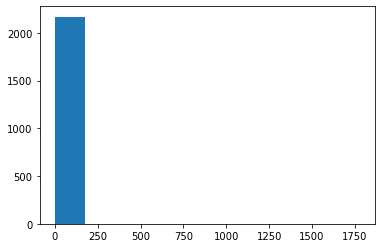

In [64]:
plt.hist(data=df_archive_clean, x='rating_numerator');

Since there are some outliers (ratings much bigger than 20), let's zoom in to rating around 5-20.

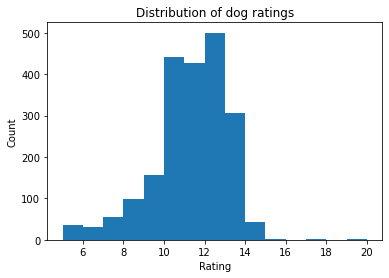

In [65]:
# set bins from 5 to 20 inclusive
bins = np.arange(5, 21, 1);
plt.hist(data=df_archive_clean, x='rating_numerator', bins=bins);
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of dog ratings');

Most of the ratings are around 11-14. 

### Does ratings vary over time?

For this question, let's look at monthly average dog ratings given out by WeRateDogs.

In [66]:
# exclude outlier (rating > 30)
df_archive_clean_below_30 = df_archive_clean[df_archive_clean.rating_numerator <=30]
rating_monthly_avg = df_archive_clean_below_30.groupby(pd.Grouper(freq='M', key='timestamp')).mean()
rating_monthly_avg = rating_monthly_avg.reset_index()

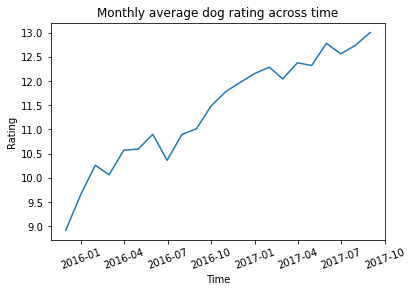

In [67]:
# monthly average dog rating
plt.errorbar(data=rating_monthly_avg, x='timestamp', y='rating_numerator');
plt.xticks(rotation=20);
plt.title('Monthly average dog rating across time');
plt.xlabel('Time');
plt.ylabel('Rating');

We can see the monthly average dog rating is increasing. It might indicate dogs are getting cuter!

### Which type of dogs get the most retweets and likes?

In [68]:
# fill out all dog type
df_all_dog = df_archive_clean.query('p1_dog == True')
df_all_dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1658 entries, 1 to 2355
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1658 non-null   object        
 1   timestamp           1658 non-null   datetime64[ns]
 2   text                1658 non-null   object        
 3   expanded_urls       1600 non-null   object        
 4   rating_numerator    1658 non-null   int64         
 5   rating_denominator  1658 non-null   int64         
 6   name                1658 non-null   object        
 7   dog_stage           1658 non-null   object        
 8   jpg_url             1477 non-null   object        
 9   img_num             1477 non-null   float64       
 10  p1                  1477 non-null   object        
 11  p1_conf             1477 non-null   float64       
 12  p1_dog              1658 non-null   bool          
 13  favorite_count      1651 non-null   Int64       

In [69]:
# group by dog types
retweet_mean_by_dog_type = df_all_dog.groupby('p1')['retweet_count'].mean()
like_mean_by_dog_type = df_all_dog.groupby('p1')['favorite_count'].mean()

In [70]:
# get top 10 dog types
retweet_mean_by_dog_type_top_10 = retweet_mean_by_dog_type.reset_index().nlargest(10, 'retweet_count')
like_mean_by_dog_type_top_10 = like_mean_by_dog_type.reset_index().nlargest(10, 'favorite_count')

In [71]:
# help function to plot barplot with count displayed
def barplot_w_count(df, col, title):
    plt.figure(figsize=[15,5])
    sb.barplot(data=df, y='p1', x=col, color=sb.color_palette()[0]);
    plt.title(title);
    for i in range(df.shape[0]): 
        count = df.iloc[i][col]
        plt.text(int(count)+1, i, int(count), va='center')    

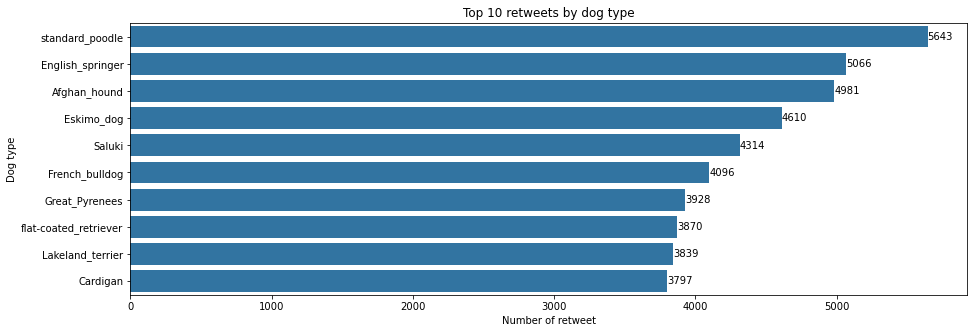

In [72]:
# Top 10 retweets by dog type barplot
barplot_w_count(retweet_mean_by_dog_type_top_10, 'retweet_count', 'Top 10 retweets by dog type')
plt.xlabel('Number of retweet');
plt.ylabel('Dog type');

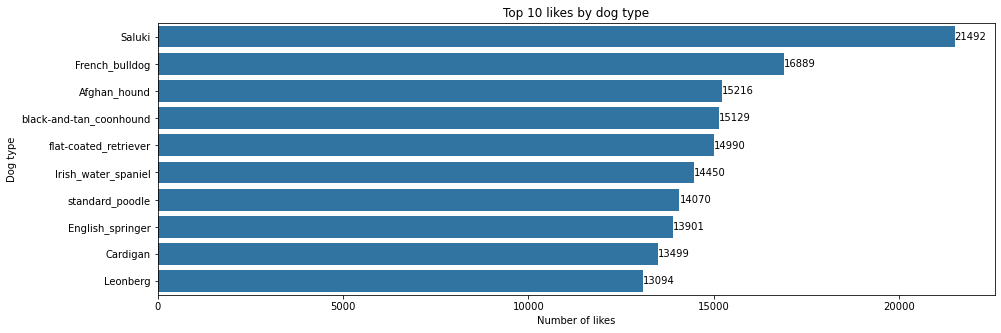

In [73]:
# Top 10 likes by dog type barplot
barplot_w_count(like_mean_by_dog_type_top_10, 'favorite_count', 'Top 10 likes by dog type')
plt.xlabel('Number of likes');
plt.ylabel('Dog type');